# EDA on data

## Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the data

In [2]:
path = '/content/drive/My Drive/Data science/Machine Learning - I/Linear Regression Assignment/day.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

categorical variables  --> 'season' , 'yr' , 'mnth' , 'holiday' , 'weekday', 'workingday' , 'weathersit'.

Continuous variables  --> 'temp' , 'atemp' , 'hum'  , 'windspeed' .



Dropping the Columns (not required for analysis)

In [7]:
df.drop(['instant','dteday','casual', 'registered'],1,inplace=True)
#dropped instant as it is giving instant of the entry(unique for each column)
#dropped dteday as this information already captured(redundant variable)
#dropped casual and registerd as these are representation of target variables and will not be present in prediction data

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [10]:
# checking for null values in data
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Converting Categorical columns from Numerical

In [11]:
df.season = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df.mnth = df['mnth'].map({1:'January',2:'February',3:'March',4:'April',
                          5:'May',6:'June',7:'July',8:'August',9:'September',
                          10:'October',11:'November',12:'December'})
df.weekday = df['weekday'].map({6:'Saturday',0:'Sunday',1:'Monday',2:'Tuesday',
                                3:'Wednesday',4:'Thursday',5:'Friday'})
df.weathersit = df['weathersit'].map({1:'Clear',2:'Mist+cloudy',
                                      3:'Light Snow Rain',4:'Heavy Rain'})

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Correlation Analysis

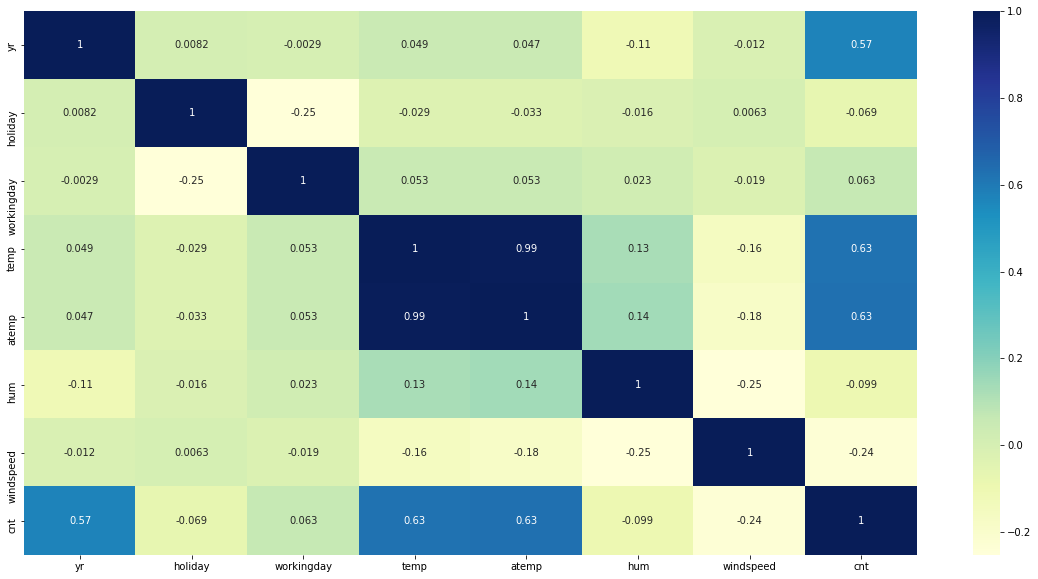

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap= 'YlGnBu')
plt.show()

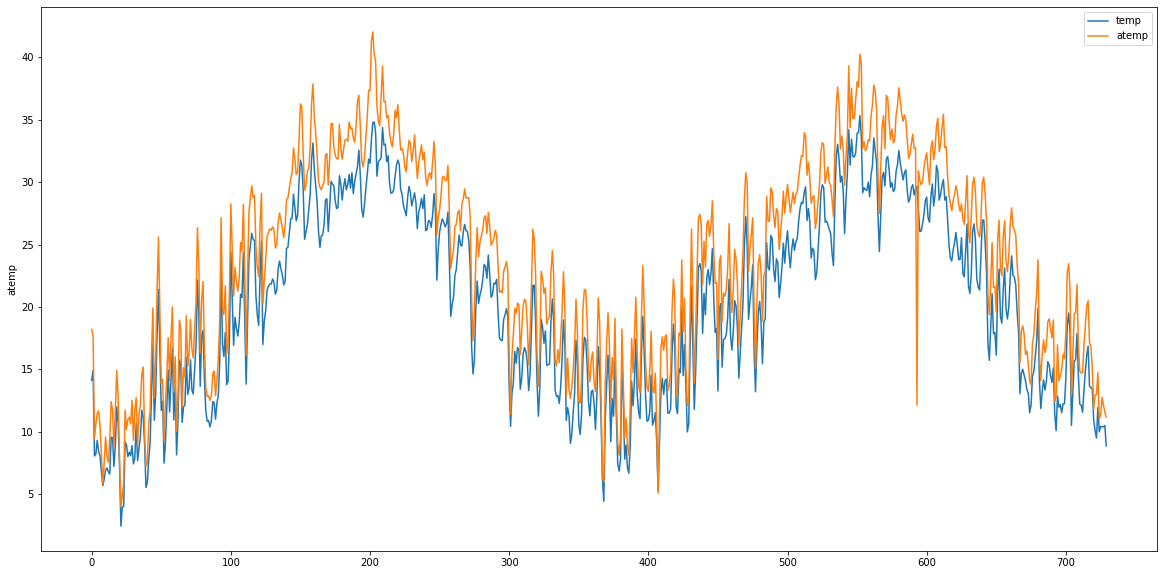

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(df.index,df.temp)
sns.lineplot(df.index,df.atemp)
plt.legend(['temp','atemp'])
plt.show()

As we can see temp and atemp are ver similar


In [15]:
df.drop('temp',1,inplace=True)
#dropped temp as it is similar to atemp, which may cause multicollinearity

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist+cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist+cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


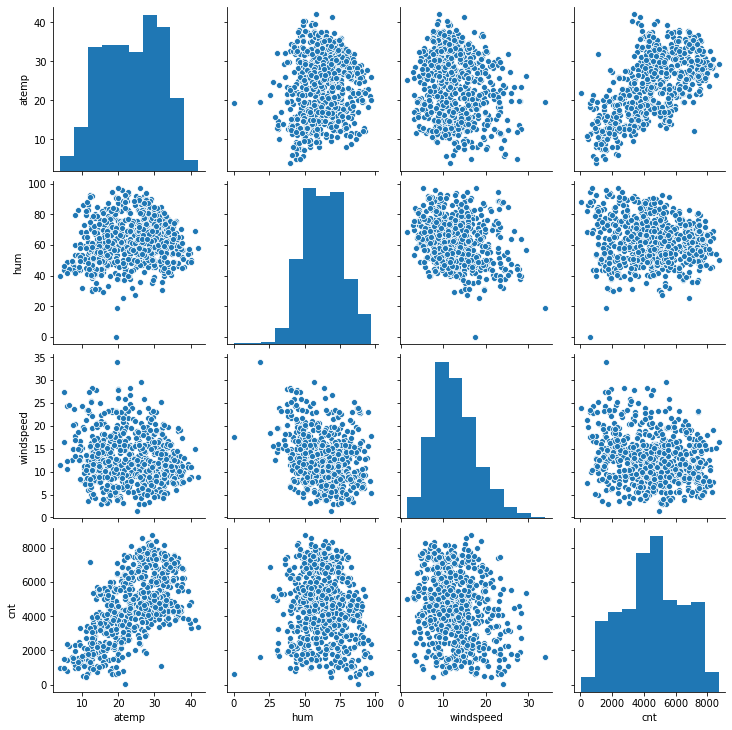

In [17]:
continuous_var = ['atemp','hum','windspeed','cnt']
sns.pairplot(df[continuous_var])
plt.show()

## Creating Dummy variables for categorical columns

In [18]:
dummy_df = pd.get_dummies(df[['season','mnth','weekday','weathersit']],drop_first=True)

In [19]:
dummy_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow Rain,weathersit_Mist+cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
df = pd.concat([df,dummy_df],axis = 1)

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow Rain,weathersit_Mist+cloudy
0,Spring,0,January,0,Saturday,0,Mist+cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Sunday,0,Mist+cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Univariate analysis

### Lineplots for seeing trends of data

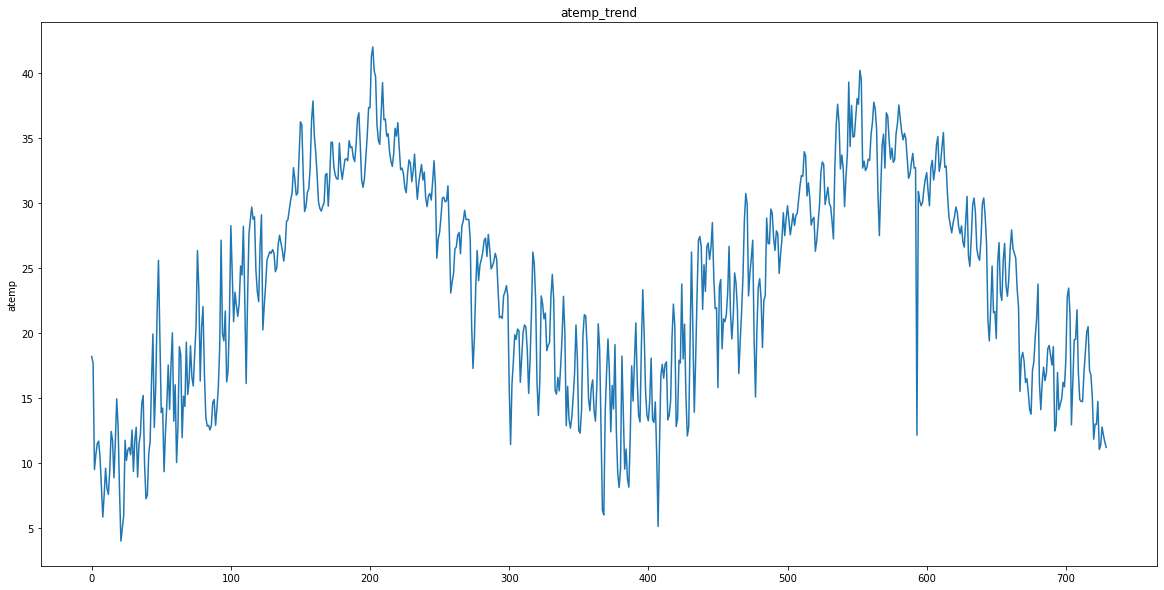

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(df.index,df.atemp)
plt.title('atemp_trend')
plt.show()

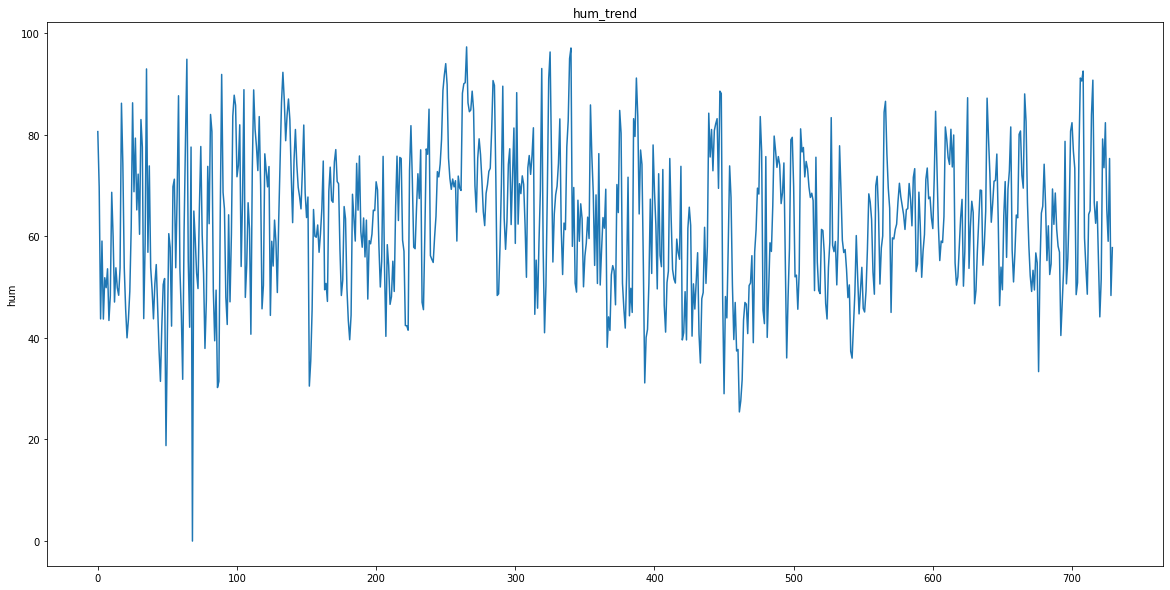

In [23]:
plt.figure(figsize = (20,10))
sns.lineplot(df.index,df.hum)
plt.title('hum_trend')
plt.show()

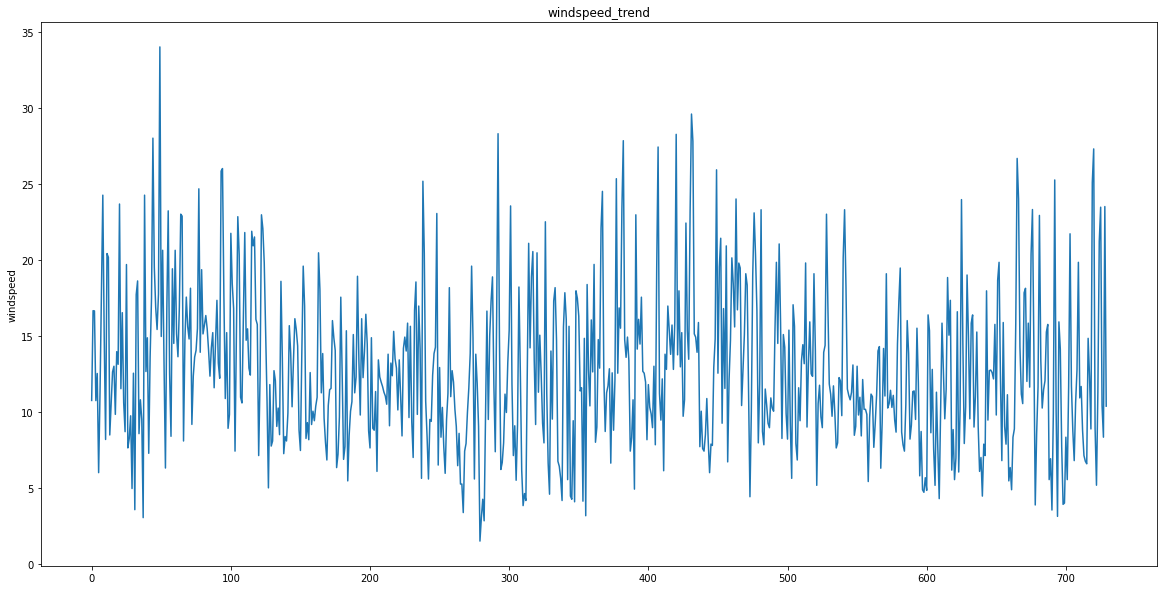

In [24]:
plt.figure(figsize = (20,10))
sns.lineplot(df.index,df.windspeed)
plt.title('windspeed_trend')
plt.show()

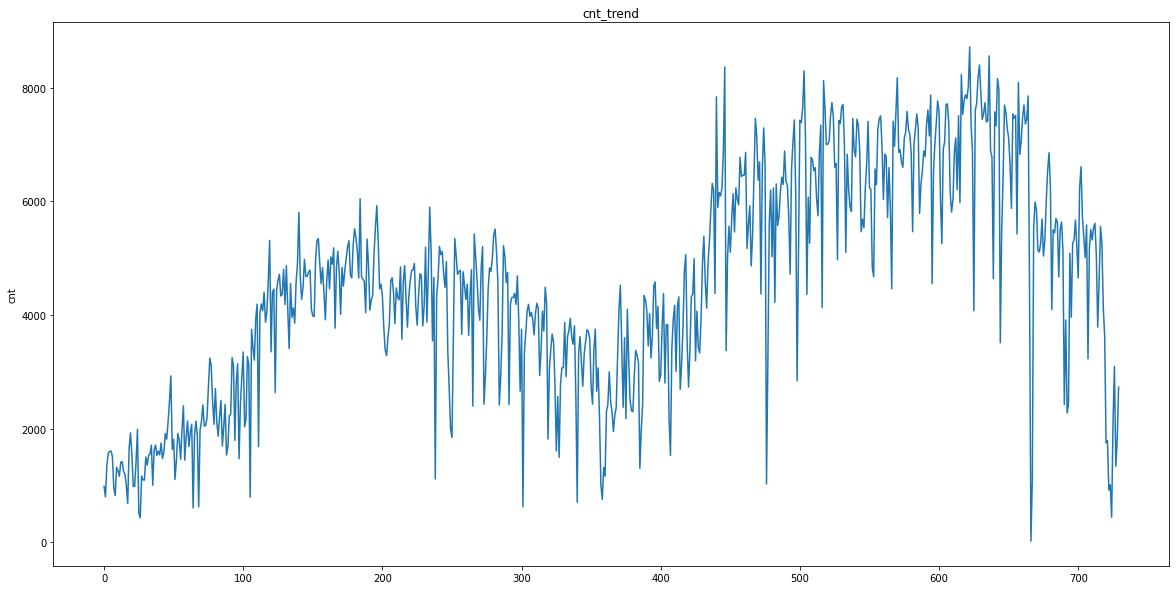

In [25]:
plt.figure(figsize = (20,10))
sns.lineplot(df.index,df.cnt)
plt.title('cnt_trend')
plt.show()

### Distplots and boxplots

Distplots for looking into the distribution of data and Boxplot for checking outliers. 

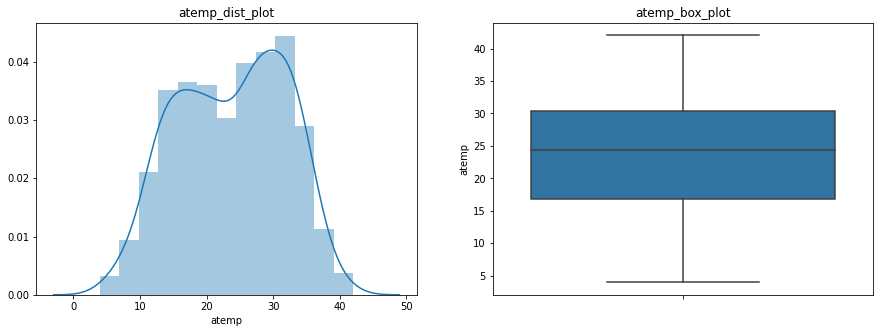

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['atemp'])
plt.title('atemp_dist_plot')
plt.subplot(1,2,2)
sns.boxplot(df['atemp'],orient='v')
plt.title('atemp_box_plot')
plt.show()

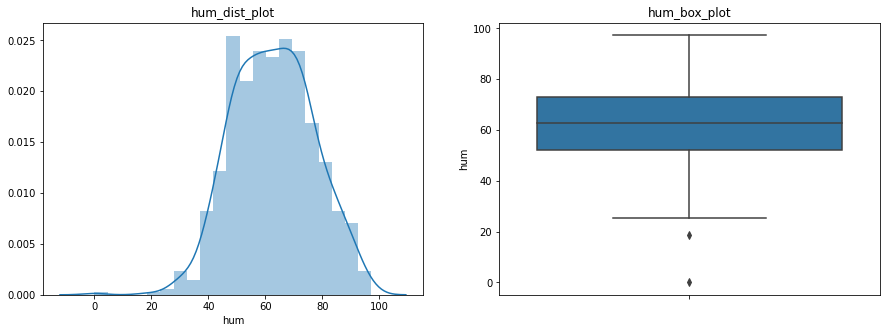

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['hum'])
plt.title('hum_dist_plot')
plt.subplot(1,2,2)
sns.boxplot(df['hum'],orient='v')
plt.title('hum_box_plot')
plt.show()

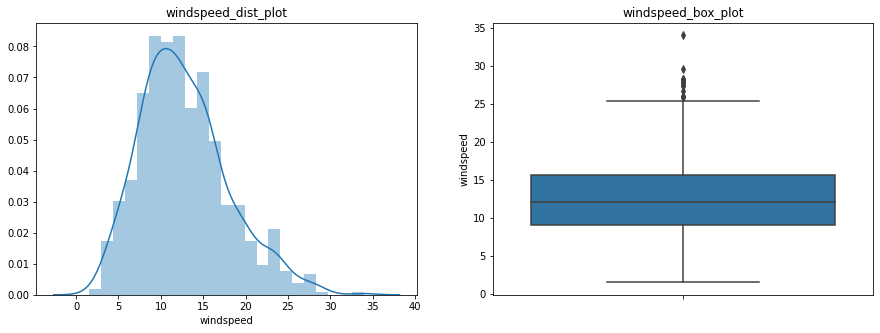

In [28]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['windspeed'])
plt.title('windspeed_dist_plot')
plt.subplot(1,2,2)
sns.boxplot(df['windspeed'],orient='v')
plt.title('windspeed_box_plot')

plt.show()

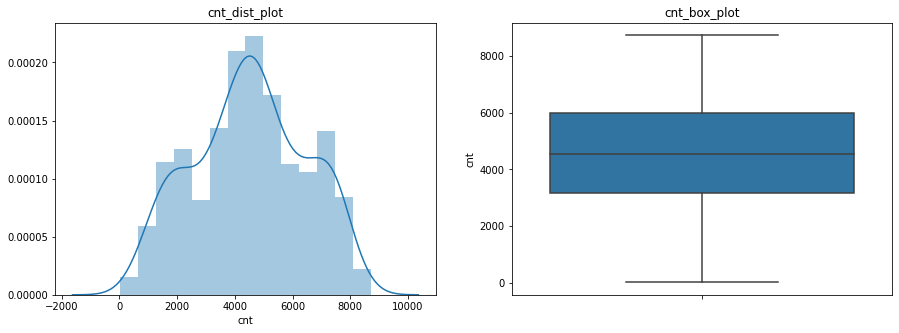

In [29]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['cnt'])
plt.title('cnt_dist_plot')
plt.subplot(1,2,2)
sns.boxplot(df['cnt'],orient='v')
plt.title('cnt_box_plot')

plt.show()

### Countplots for seeing the number of entries

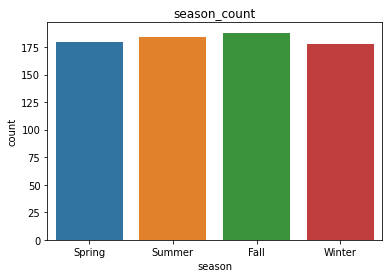

In [30]:
sns.countplot(df.season)
plt.title('season_count')
plt.show()

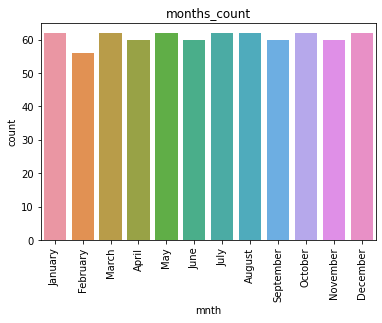

In [31]:
sns.countplot(df.mnth)
plt.title('months_count')
plt.xticks(rotation = 90)
plt.show()


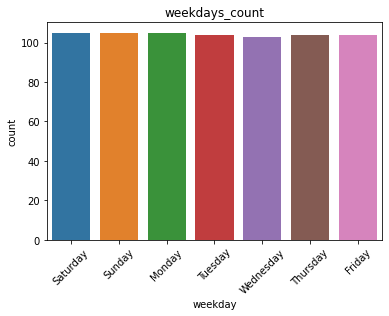

In [32]:
sns.countplot(df.weekday)
plt.xticks(rotation = 45)
plt.title('weekdays_count')
plt.show()


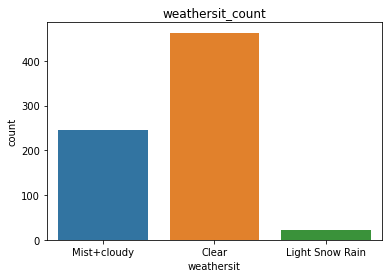

In [33]:
sns.countplot(df.weathersit)
plt.title('weathersit_count')
plt.show()


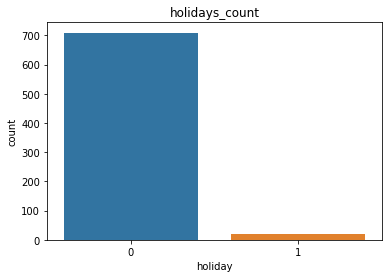

In [34]:
sns.countplot(df.holiday)
plt.title('holidays_count')
plt.show()


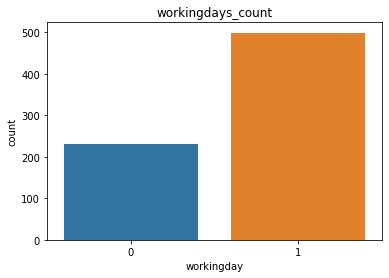

In [35]:
sns.countplot(df.workingday)
plt.title('workingdays_count')
plt.show()


## Multivariate analysis

### Barplots

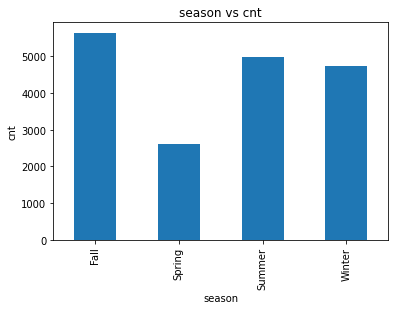

In [36]:
df.groupby(by ='season')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('season vs cnt')
plt.show()


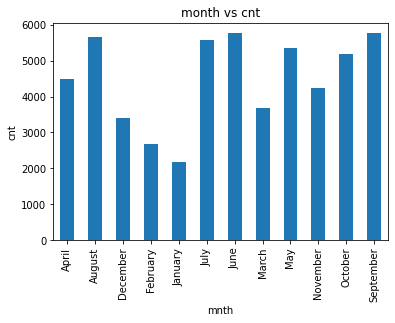

In [37]:
df.groupby(by ='mnth')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('month vs cnt')
plt.show()

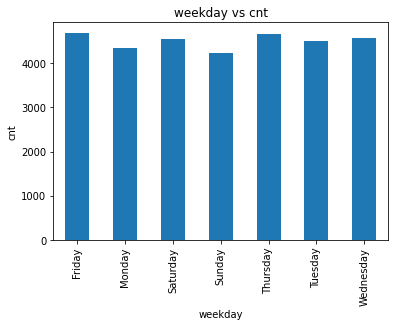

In [38]:
df.groupby(by ='weekday')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('weekday vs cnt')
plt.show()


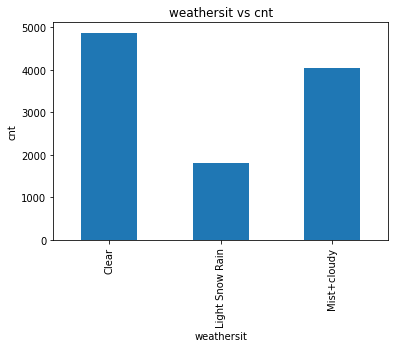

In [39]:
df.groupby(by ='weathersit')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('weathersit vs cnt')
plt.show()


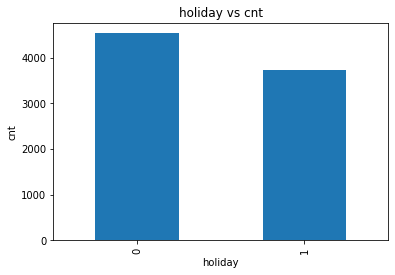

In [40]:
df.groupby(by ='holiday')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('holiday vs cnt')
plt.show()


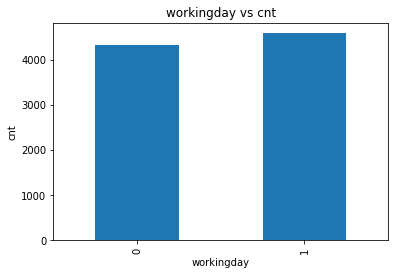

In [41]:
df.groupby(by ='workingday')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('workingday vs cnt')
plt.show()


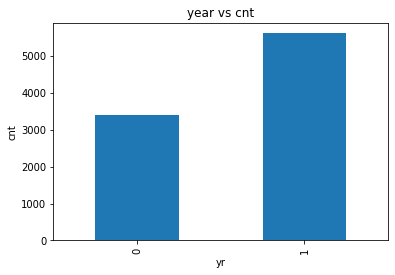

In [42]:
df.groupby(by ='yr')['cnt'].mean().plot(kind = 'bar')
plt.ylabel('cnt')
plt.title('year vs cnt')
plt.show()

### Scatter plots (numeric vs numeric)

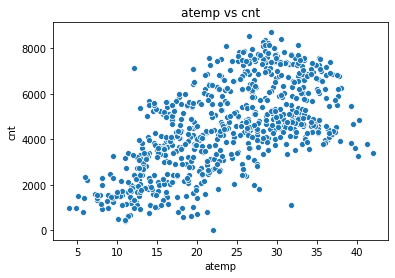

In [43]:
sns.scatterplot(df.atemp,df.cnt)
plt.title('atemp vs cnt')
plt.show()


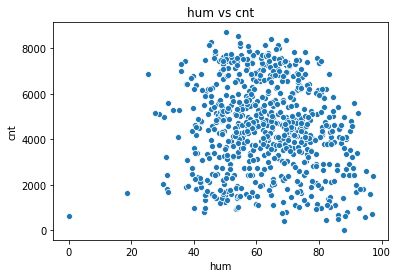

In [44]:
sns.scatterplot(df.hum,df.cnt)
plt.title('hum vs cnt')
plt.show()


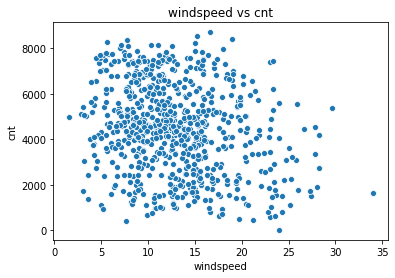

In [45]:
sns.scatterplot(df.windspeed,df.cnt)
plt.title('windspeed vs cnt')
plt.show()


In [46]:
df.drop(['season','mnth','weekday','weathersit'],axis = 1 ,inplace = True) #as we have created dummy variables these are redundant

In [47]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow Rain,weathersit_Mist+cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building

## Splitting data (Train-Test)

In [48]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size = 0.3,random_state = 2)

## Scaling the variables

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
num_vars = ['atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow Rain,weathersit_Mist+cloudy
165,0,0,1,0.667717,0.366326,0.299998,5180,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
573,1,0,0,0.811910,0.549219,0.278224,6685,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
267,0,0,0,0.647874,0.848305,0.057698,5010,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
551,1,0,1,0.884012,0.339429,0.255118,6207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,0,0,1,0.743981,0.753631,0.388482,3542,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


## Dividing in to X and y set for model building

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model building using RFE

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_Light Snow Rain', 'weathersit_Mist+cloudy'],
      dtype='object')

In [55]:
x = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
x.columns = ['column','Selected','rank']
x

,column,Selected,rank
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,atemp,True,1
4,hum,True,1
5,windspeed,True,1
6,season_Spring,True,1
7,season_Summer,False,9
8,season_Winter,True,1
9,mnth_August,False,10


In [56]:
X_train_rfe = X_train[cols]

In [57]:
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_Light Snow Rain', 'weathersit_Mist+cloudy'],
      dtype='object')

In [58]:
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Snow Rain,weathersit_Mist+cloudy
165,0,0,1,0.667717,0.366326,0.299998,0,0,0,0,0,0,0,0,0
573,1,0,0,0.811910,0.549219,0.278224,0,0,0,0,1,0,0,0,0
267,0,0,0,0.647874,0.848305,0.057698,0,1,0,0,0,0,1,0,1
551,1,0,1,0.884012,0.339429,0.255118,0,0,0,0,1,0,0,0,0
236,0,0,1,0.743981,0.753631,0.388482,0,0,0,0,0,0,0,0,1


In [59]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe).fit()
lm_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.82e-187
Time:                        12:03:42   Log-Likelihood:                -4123.3
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     495   BIC:                             8346.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3257.4969    259.389     12.558      0.000    2747.858    3767.136
yr                          1966.9555     70.661     27.836      0.000    1828.123    2105.788
holiday                     -516.6866    207.233     -2.493      0.013    -923.852    -109.521
workingday                   175.6376     77.756      2.259      0.024      22.865     328.411
atemp                       3702.4809    299.944     12.344      0.000    3113.161    4291.801
hum                        -1376.8748    275.811     -4.992      0.000   -1918.779    -834.970
windspeed                  -1534.2348    242.062     -6.338      0.000   -2009.831   -1058.639
season_Spring              -1170.5536    133.819     -8.747      0.000   -1433.477    -907.631
season_Winter                588.0157    120.310      4.887      0.000     351.634     824.397
mnth_December               -553.2855    140.823     -3.929      0.000    -829.970    -276.601
mnth_January                -358.6384    155.720     -2.303      0.022    -664.593     -52.684
mnth_July                   -454.2498    145.721     -3.117      0.002    -740.557    -167.943
mnth_November               -573.7742    165.406     -3.469      0.001    -898.759    -248.789
mnth_September               491.2630    129.753      3.786      0.000     236.328     746.198
weathersit_Light Snow Rain -1768.8316    256.572     -6.894      0.000   -2272.937   -1264.726
weathersit_Mist+cloudy      -435.7976     93.691     -4.651      0.000    -619.879    -251.716
==============================================================================
Omnibus:                       76.715   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.406
Skew:                          -0.743   Prob(JB):                     2.49e-45
Kurtosis:                       5.728   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.74
4,atemp,3.50
7,season_Spring,2.84
8,season_Winter,2.15
5,hum,2.08
15,weathersit_Mist+cloudy,1.62
12,mnth_November,1.60
10,mnth_January,1.52
9,mnth_December,1.40
14,weathersit_Light Snow Rain,1.35


## Manually removing more columns based on p-values and VIF

In [61]:
X_train_rfe_new = X_train_rfe.drop('workingday',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_2 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.63e-187
Time:                        12:03:42   Log-Likelihood:                -4126.0
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     496   BIC:                             8345.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3357.9543    256.602     13.086      0.000    2853.793    3862.116
yr                          1971.1990     70.928     27.792      0.000    1831.843    2110.555
holiday                     -635.7910    201.240     -3.159      0.002   -1031.179    -240.403
atemp                       3771.4775    299.616     12.588      0.000    3182.805    4360.150
hum                        -1398.8457    276.777     -5.054      0.000   -1942.645    -855.046
windspeed                  -1566.0837    242.648     -6.454      0.000   -2042.829   -1089.338
season_Spring              -1157.5304    134.246     -8.622      0.000   -1421.292    -893.769
season_Winter                593.0502    120.786      4.910      0.000     355.735     830.365
mnth_December               -565.0639    141.307     -3.999      0.000    -842.699    -287.429
mnth_January                -357.6187    156.362     -2.287      0.023    -664.833     -50.405
mnth_July                   -471.2684    146.126     -3.225      0.001    -758.371    -184.166
mnth_November               -573.3832    166.089     -3.452      0.001    -899.707    -247.059
mnth_September               477.5663    130.146      3.669      0.000     221.860     733.272
weathersit_Light Snow Rain -1733.2701    257.146     -6.740      0.000   -2238.500   -1228.041
weathersit_Mist+cloudy      -419.1659     93.787     -4.469      0.000    -603.434    -234.897
==============================================================================
Omnibus:                       75.749   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.709
Skew:                          -0.756   Prob(JB):                     6.39e-42
Kurtosis:                       5.574   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train_rfe_new = X_train_rfe_new.drop('mnth_January',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_3 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.51e-187
Time:                        12:03:42   Log-Likelihood:                -4128.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     497   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3243.2747    252.725     12.833      0.000    2746.734    3739.815
yr                          1961.4520     71.100     27.587      0.000    1821.758    2101.146
holiday                     -640.6814    202.084     -3.170      0.002   -1037.725    -243.638
atemp                       3950.7388    290.410     13.604      0.000    3380.155    4521.322
hum                        -1423.1945    277.747     -5.124      0.000   -1968.897    -877.492
windspeed                  -1515.6213    242.670     -6.246      0.000   -1992.406   -1038.837
season_Spring              -1222.9446    131.721     -9.284      0.000   -1481.744    -964.145
season_Winter                597.3484    121.284      4.925      0.000     359.055     835.642
mnth_December               -482.3149    137.177     -3.516      0.000    -751.834    -212.796
mnth_July                   -500.7456    146.175     -3.426      0.001    -787.943    -213.549
mnth_November               -531.3513    165.770     -3.205      0.001    -857.048    -205.655
mnth_September               478.0375    130.699      3.658      0.000     221.247     734.828
weathersit_Light Snow Rain -1727.7343    258.227     -6.691      0.000   -2235.085   -1220.384
weathersit_Mist+cloudy      -414.3822     94.162     -4.401      0.000    -599.386    -229.378
==============================================================================
Omnibus:                       72.495   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.369
Skew:                          -0.738   Prob(JB):                     1.37e-38
Kurtosis:                       5.451   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.04
3,atemp,3.22
6,season_Spring,2.71
7,season_Winter,2.15
4,hum,2.08
13,weathersit_Mist+cloudy,1.61
10,mnth_November,1.58
12,weathersit_Light Snow Rain,1.35
9,mnth_July,1.31
8,mnth_December,1.30


In [64]:
X_train_rfe_new = X_train_rfe_new.drop('holiday',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_4 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.44e-186
Time:                        12:03:42   Log-Likelihood:                -4133.8
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     498   BIC:                             8349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3254.9491    254.984     12.765      0.000    2753.972    3755.926
yr                          1956.3312     71.725     27.275      0.000    1815.410    2097.252
atemp                       3949.0107    293.037     13.476      0.000    3373.269    4524.752
hum                        -1457.3431    280.049     -5.204      0.000   -2007.566    -907.120
windspeed                  -1527.6585    244.835     -6.240      0.000   -2008.695   -1046.622
season_Spring              -1241.3077    132.784     -9.348      0.000   -1502.194    -980.421
season_Winter                597.4857    122.382      4.882      0.000     357.038     837.933
mnth_December               -491.0057    138.391     -3.548      0.000    -762.907    -219.104
mnth_July                   -503.5108    147.495     -3.414      0.001    -793.300    -213.722
mnth_November               -554.0417    167.114     -3.315      0.001    -882.376    -225.707
mnth_September               463.7246    131.803      3.518      0.000     204.767     722.682
weathersit_Light Snow Rain -1689.0929    260.272     -6.490      0.000   -2200.460   -1177.726
weathersit_Mist+cloudy      -405.0471     94.967     -4.265      0.000    -591.633    -218.461
==============================================================================
Omnibus:                       79.622   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.746
Skew:                          -0.806   Prob(JB):                     2.31e-42
Kurtosis:                       5.531   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_train_rfe_new = X_train_rfe_new.drop('mnth_November',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_5 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.11e-185
Time:                        12:03:42   Log-Likelihood:                -4139.3
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     499   BIC:                             8353.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3146.5728    255.399     12.320      0.000    2644.783    3648.363
yr                          1951.3120     72.423     26.943      0.000    1809.019    2093.604
atemp                       4129.5981    290.799     14.201      0.000    3558.257    4700.939
hum                        -1492.9884    282.630     -5.282      0.000   -2048.280    -937.697
windspeed                  -1522.8809    247.270     -6.159      0.000   -2008.699   -1037.063
season_Spring              -1192.8886    133.294     -8.949      0.000   -1454.774    -931.003
season_Winter                422.2839    111.483      3.788      0.000     203.249     641.319
mnth_December               -346.1976    132.625     -2.610      0.009    -606.771     -85.625
mnth_July                   -526.3040    148.802     -3.537      0.000    -818.660    -233.948
mnth_September               511.1816    132.328      3.863      0.000     251.192     771.171
weathersit_Light Snow Rain -1680.8127    262.853     -6.394      0.000   -2197.248   -1164.378
weathersit_Mist+cloudy      -384.9735     95.718     -4.022      0.000    -573.034    -196.913
==============================================================================
Omnibus:                       76.607   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.454
Skew:                          -0.785   Prob(JB):                     6.53e-40
Kurtosis:                       5.452   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_rfe_new = X_train_rfe_new.drop('mnth_December',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_6 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.83e-185
Time:                        12:03:42   Log-Likelihood:                -4142.8
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     500   BIC:                             8354.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3100.9195    256.277     12.100      0.000    2597.408    3604.431
yr                          1942.0543     72.756     26.693      0.000    1799.109    2084.999
atemp                       4235.4841    289.625     14.624      0.000    3666.452    4804.516
hum                        -1542.9041    283.617     -5.440      0.000   -2100.132    -985.676
windspeed                  -1493.5688    248.447     -6.012      0.000   -1981.697   -1005.441
season_Spring              -1209.6613    133.910     -9.033      0.000   -1472.758    -946.565
season_Winter                366.3294    110.037      3.329      0.001     150.137     582.522
mnth_July                   -543.2551    149.522     -3.633      0.000    -837.024    -249.486
mnth_September               532.7010    132.837      4.010      0.000     271.714     793.688
weathersit_Light Snow Rain -1660.7227    264.263     -6.284      0.000   -2179.926   -1141.519
weathersit_Mist+cloudy      -391.0643     96.244     -4.063      0.000    -580.157    -201.971
==============================================================================
Omnibus:                       72.833   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.262
Skew:                          -0.772   Prob(JB):                     1.58e-35
Kurtosis:                       5.268   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_train_rfe_new = X_train_rfe_new.drop('season_Winter',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_7 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.39e-184
Time:                        12:03:42   Log-Likelihood:                -4148.4
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     501   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3467.5749    233.721     14.836      0.000    3008.381    3926.769
yr                          1955.1107     73.378     26.645      0.000    1810.945    2099.276
atemp                       3745.1160    251.869     14.869      0.000    3250.266    4239.966
hum                        -1400.0462    283.159     -4.944      0.000   -1956.372    -843.720
windspeed                  -1606.1432    248.599     -6.461      0.000   -2094.569   -1117.718
season_Spring              -1466.1395    110.626    -13.253      0.000   -1683.488   -1248.791
mnth_July                   -552.8864    150.991     -3.662      0.000    -849.540    -256.233
mnth_September               517.1028    134.083      3.857      0.000     253.668     780.538
weathersit_Light Snow Rain -1621.6570    266.646     -6.082      0.000   -2145.540   -1097.774
weathersit_Mist+cloudy      -419.9105     96.813     -4.337      0.000    -610.121    -229.700
==============================================================================
Omnibus:                       62.191   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.507
Skew:                          -0.721   Prob(JB):                     3.05e-26
Kurtosis:                       4.855   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.53
2,atemp,2.26
3,hum,2.02
5,season_Spring,1.78
9,weathersit_Mist+cloudy,1.59
8,weathersit_Light Snow Rain,1.34
6,mnth_July,1.31
4,windspeed,1.18
7,mnth_September,1.12
1,yr,1.02


In [69]:
X_train_rfe_new = X_train_rfe_new.drop('weathersit_Mist+cloudy',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_8 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.08e-181
Time:                        12:03:42   Log-Likelihood:                -4157.8
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     502   BIC:                             8372.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3659.1010    233.548     15.667      0.000    3200.249    4117.953
yr                          1943.8002     74.621     26.049      0.000    1797.192    2090.408
atemp                       3970.4564    250.787     15.832      0.000    3477.735    4463.177
hum                        -2114.3134    234.398     -9.020      0.000   -2574.836   -1653.791
windspeed                  -1760.2891    250.373     -7.031      0.000   -2252.197   -1268.381
season_Spring              -1432.9882    112.303    -12.760      0.000   -1653.630   -1212.347
mnth_July                   -577.2012    153.541     -3.759      0.000    -878.863    -275.540
mnth_September               518.7367    136.441      3.802      0.000     250.671     786.802
weathersit_Light Snow Rain -1197.0456    252.387     -4.743      0.000   -1692.910    -701.181
==============================================================================
Omnibus:                       59.458   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.547
Skew:                          -0.723   Prob(JB):                     3.27e-23
Kurtosis:                       4.666   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.04
2,atemp,2.17
5,season_Spring,1.77
3,hum,1.33
6,mnth_July,1.31
8,weathersit_Light Snow Rain,1.16
4,windspeed,1.15
7,mnth_September,1.12
1,yr,1.02


In [71]:
X_train_rfe_new = X_train_rfe_new.drop('mnth_September',1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm_9 = sm.OLS(y_train,X_train_rfe_new).fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     315.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.04e-179
Time:                        12:03:42   Log-Likelihood:                -4165.1
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     503   BIC:                             8380.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3599.9906    236.126     15.246      0.000    3136.076    4063.906
yr                          1941.2558     75.609     25.675      0.000    1792.707    2089.805
atemp                       4135.5406    250.281     16.524      0.000    3643.816    4627.265
hum                        -2016.7417    236.085     -8.542      0.000   -2480.575   -1552.908
windspeed                  -1822.0656    253.164     -7.197      0.000   -2319.456   -1324.676
season_Spring              -1442.6818    113.766    -12.681      0.000   -1666.196   -1219.167
mnth_July                   -684.8452    152.912     -4.479      0.000    -985.271    -384.419
weathersit_Light Snow Rain -1223.4569    255.643     -4.786      0.000   -1725.717    -721.197
==============================================================================
Omnibus:                       60.316   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.699
Skew:                          -0.729   Prob(JB):                     1.12e-23
Kurtosis:                       4.685   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.87
2,atemp,2.10
5,season_Spring,1.77
3,hum,1.32
6,mnth_July,1.26
7,weathersit_Light Snow Rain,1.16
4,windspeed,1.15
1,yr,1.02


## Reporting final model Top Predictors

In [73]:
x = pd.DataFrame(lm_9.params).reset_index()
x.columns = ['variable','coeff']
x.coeff = round(x['coeff'],2)
x['abs_coeff'] = abs(x.coeff)
x = x.sort_values('abs_coeff',ascending=False)
x

,variable,coeff,abs_coeff
2,atemp,4135.54,4135.54
0,const,3599.99,3599.99
3,hum,-2016.74,2016.74
1,yr,1941.26,1941.26
4,windspeed,-1822.07,1822.07
5,season_Spring,-1442.68,1442.68
7,weathersit_Light Snow Rain,-1223.46,1223.46
6,mnth_July,-684.85,684.85


Variables have positive effect on target --> 'const' , 'yr' , 'atemp'.

Variables have negative effect on target --> 'hum' , 'windspeed' ,'season_Spring' , 'mnth_July' , 'weathersit_Light Snow Rain'.

## Residual Analysis on Train data

In [74]:
y_train_pred = lm_9.predict(X_train_rfe_new)

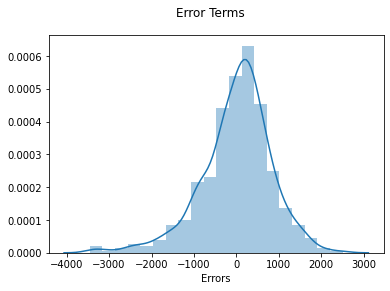

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

We can see that error terms are normally distributed

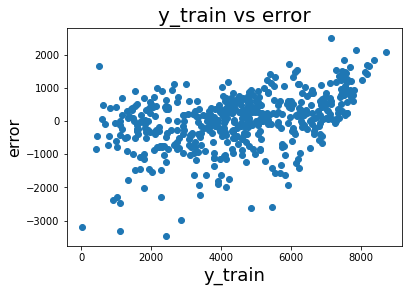

In [76]:
plt.scatter(y_train,y_train-y_train_pred)
plt.title('y_train vs error', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.show()

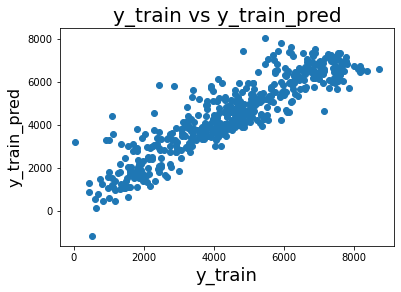

In [77]:
plt.scatter(y_train,y_train_pred)
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

# Model Testing

## Scaling the variables

In [78]:
df_test[num_vars] = scaler.transform(df_test[num_vars]) #only transform need to be done on test data
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow Rain,weathersit_Mist+cloudy
670,1,0,1,0.363564,0.431414,0.502572,5847,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
199,0,0,1,0.877378,0.597095,0.223077,4541,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
77,0,0,0,0.508588,0.246907,0.712834,3117,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
225,0,0,0,0.715804,0.812803,0.412808,3820,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
37,0,0,1,0.294803,0.710597,0.047450,1712,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Dividing in to X and y set on test data

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X_train_rfe_new.columns

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'mnth_July', 'weathersit_Light Snow Rain'],
      dtype='object')

In [81]:
X_test_new = X_test[['yr', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'mnth_July', 'weathersit_Light Snow Rain']]
X_test_new = sm.add_constant(X_test_new)

## Making predictions on test data

In [82]:
y_test_pred = lm_9.predict(X_test_new)

In [83]:
y_test_pred.head()

670    5259.008582
199    4932.927492
77     2463.815163
225    4168.851278
37     1856.930386
dtype: float64

## Evaluating model on Test set

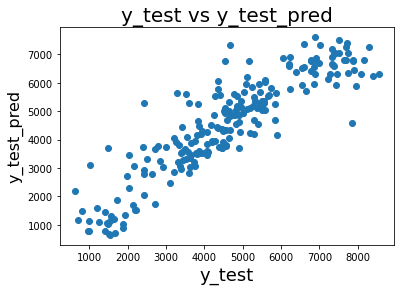

In [84]:
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

As we can see Error terms have constant variance (homoscedasticity)

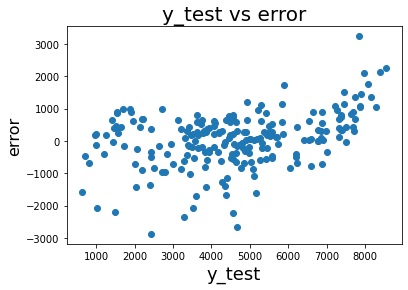

In [85]:
plt.scatter(y_test,y_test-y_test_pred)
plt.title('y_test vs error', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.show()

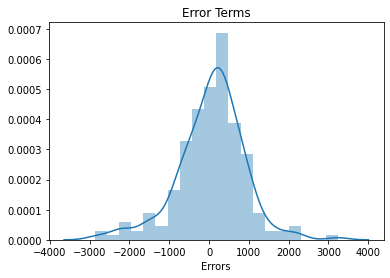

In [86]:
sns.distplot((y_test - y_test_pred), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

In [87]:
from sklearn.metrics import r2_score
print(f'R-squared of test data : {r2_score(y_test,y_test_pred)}')

R-squared of test data : 0.8008165436520648


We got R-squared of 0.8 on test data which is very good !!!